# Exercício em Python - Tema 6 - Integração Água Superficial e Subterrânea

Este exercício tem por objetivo avaliar a base de dados do CABra no contexto dos fluxos inter-bacias. Vamos inicialmente calcular o ECI e razão Aeff / Atopo para as 735 bacias hidrográficas com seus parâmetros climáticos, topográficos e de vazão. Classificaremos as bacias de acordo com a razão Aeff / Atopo e analisaremos as relações entre parâmetros das bacias.

##1. Importação de bibliotecas.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import io
import requests

##2. Importação dos dados do CABra

*  Importação da base de dados climáticos de longo termo

In [ ]:
#Importação da base de dados climáticos de longo termo
url = ("https://raw.githubusercontent.com/brunokenmarchezepe/CABra_exercicios/main/CABRA_dataset/CABra_attributes/CABra_climate_attributes.txt")

bacia_p = requests.get(url).content
bacia_p = pd.read_csv(io.StringIO(bacia_p.decode('utf-8', errors = 'ignore')),
                 skiprows = 8,
                 delimiter='\t')

bacia_p.columns = ['CABra ID', 'ANA ID', 'clim_p', 'clim_tmin', 'clim_tmax', 'clim_rh', 'clim_wind', 'clim_srad', 'clim_et', 'clim_pet', 'aridity_index', 'p_seasonality', 'clim_quality']
bacia_p.head()

,CABra ID,ANA ID,clim_p,clim_tmin,clim_tmax,clim_rh,clim_wind,clim_srad,clim_et,clim_pet,aridity_index,p_seasonality,clim_quality
0,1,13880000,5.64,21.61,30.48,83.17,0.82,16.42,3.87,5.04,0.89,0.46,2
1,2,14110000,8.88,21.83,28.60,86.41,0.42,16.24,4.29,4.96,0.56,-0.28,2
2,3,14230000,8.52,22.18,29.67,85.71,0.60,15.60,4.28,4.81,0.56,-0.27,2
3,4,14250000,8.86,22.00,29.13,86.26,0.49,15.99,4.29,4.90,0.55,-0.26,2
4,5,14260000,7.79,21.91,28.80,85.44,0.67,16.14,4.21,4.94,0.63,-0.27,2


*  Importação da base de dados de longo termo de vazão



In [ ]:
#Importação da base de dados de longo termo de vazão
url = ("https://raw.githubusercontent.com/brunokenmarchezepe/CABra_exercicios/main/CABRA_dataset/CABra_attributes/CABra_streamflow_attributes.txt")

bacia_q = requests.get(url).content
bacia_q = pd.read_csv(io.StringIO(bacia_q.decode('utf-8', errors = 'ignore')),
                 skiprows = 9,
                 delimiter='\t')

bacia_q.columns = ['CABra ID', 'ANA ID', 'q_mean', 'q_1', 'q_5', 'q_95', 'q_99', 'q_lf', 'q_ld', 'q_hf', 'q_hd', 'q_hfd', 'q_zero', 'q_cv', 'q_lcv', 'q_hcv', 'q_elasticity', 'fdc_slope', 'baseflow_index', 'runoff_coef']
bacia_q.head()

,CABra ID,ANA ID,q_mean,q_1,q_5,q_95,q_99,q_lf,q_ld,q_hf,q_hd,q_hfd,q_zero,q_cv,q_lcv,q_hcv,q_elasticity,fdc_slope,baseflow_index,runoff_coef
0,1,13880000,2.25,0.34,0.39,4.52,4.64,19,38,0,0,181,0,0.08,0.11,0.04,0.36,-4.42,93.22,0.40
1,2,14110000,5.60,0.67,1.16,11.17,11.96,15,20,0,0,248,0,0.11,0.62,0.11,0.97,-1.93,90.46,0.63
2,3,14230000,6.69,1.24,2.12,12.42,14.16,4,9,0,0,238,0,0.08,0.46,0.09,1.08,-1.58,88.67,0.79
3,4,14250000,5.72,1.03,1.72,10.63,11.77,4,9,0,0,242,0,0.10,0.50,0.10,0.89,-1.68,91.42,0.65
4,5,14260000,5.06,0.43,1.09,9.91,11.83,14,14,0,0,243,0,0.09,0.55,0.13,0.55,-1.79,88.12,0.65


*  Importação de dados topográficos

In [1]:
#Importação da base de dados topográficos
url = ("https://raw.githubusercontent.com/brunokenmarchezepe/CABra_exercicios/main/CABRA_dataset/CABra_attributes/CABra_topography_attributes.txt")

bacia_a = requests.get(url).content
bacia_a = pd.read_csv(io.StringIO(bacia_a.decode('utf-8', errors = 'ignore')),
                 skiprows = 9,
                 delimiter='\t')

bacia_a.columns = ['CABra ID', 'ANA ID', 'catch_area', 'elev_mean', 'elev_min', 'elev_max', 'elev_gauge', 'catch_slope', 'catch_order']
bacia_a.head()

NameError: name 'requests' is not defined

*  Importação de dados de águas subterrâneas

In [ ]:
#Importação da base de dados de Águas Subterrâneas
url = ("https://raw.githubusercontent.com/brunokenmarchezepe/CABra_exercicios/main/CABRA_dataset/CABra_attributes/CABra_groundwater_attributes.txt")

bacia_g = requests.get(url).content
bacia_g = pd.read_csv(io.StringIO(bacia_g.decode('utf-8', errors = 'ignore')),
                 skiprows = 8,
                 delimiter='\t')

bacia_g.columns = ['CABra ID', 'ANA ID', 'aquif_name', 'aquif_type', 'catch_wtd', 'catch_hand', 'hand_class']
bacia_g.head()

,CABra ID,ANA ID,aquif_name,aquif_type,catch_wtd,catch_hand,hand_class
0,1,13880000,Solimes,Porous,-10.446,18.104,Deep water table
1,2,14110000,Fraturado Norte,Fractured,-8.306,38.006,Deep water table
2,3,14230000,Fraturado Norte,Fractured,-2.846,16.199,Deep water table
3,4,14250000,Fraturado Norte,Fractured,-6.016,28.372,Deep water table
4,5,14260000,Fraturado Norte,Fractured,-4.131,18.239,Deep water table


*  Importação de dados gerais

In [ ]:
#Importação da base de dados gerais
url = ("https://raw.githubusercontent.com/brunokenmarchezepe/CABra_exercicios/main/CABRA_dataset/CABra_attributes/CABra_general_attributes.txt")

bacia_t = requests.get(url).content
bacia_t = pd.read_csv(io.StringIO(bacia_t.decode('utf-8', errors = 'ignore')),
                 skiprows = 8,
                 delimiter='\t')

bacia_t.columns = ['CABra ID', 'ANA ID', 'longitude', 'latitude', 'gauge_hreg', 'gauge_biome', 'gauge_state', 'missing_data', 'series_length', 'quality_index']
bacia_t.head()

,CABra ID,ANA ID,longitude,latitude,gauge_hreg,gauge_biome,gauge_state,missing_data,series_length,quality_index
0,1,13880000,-64.384,-6.541,Amazon,Amazon,AM,0.0,30,100.0
1,2,14110000,-66.851,1.215,Amazon,Amazon,AM,0.0,30,100.0
2,3,14230000,-67.595,1.074,Amazon,Amazon,AM,0.0,30,100.0
3,4,14250000,-67.313,0.372,Amazon,Amazon,AM,0.0,30,100.0
4,5,14260000,-69.126,0.477,Amazon,Amazon,AM,0.0,30,100.0


*  Escolha da bacia e filtro dentro da base de dados, e união dos dados

In [ ]:
#bacia1 = 1

#bacia_dados = pd.concat([bacia_p[bacia_p['CABra ID'] == bacia1], bacia_q[bacia_q['CABra ID'] == bacia1]], axis = 1)
#bacia_dados = pd.concat([bacia_dados, bacia_a[bacia_a['CABra ID'] == bacia1]], axis = 1)

#Escolha da bacia e filtro dentro da base de dados, e união dos dados
bacia_dados = pd.concat([bacia_p, bacia_q], axis = 1)
bacia_dados = pd.concat([bacia_dados, bacia_a], axis = 1)
bacia_dados = pd.concat([bacia_dados, bacia_g], axis = 1)
bacia_dados = pd.concat([bacia_dados, bacia_t], axis = 1)

#3. Cálculo da Área Efetiva

Calculando ECI (*Liu et al. (2020))*:

$$ECI = log_{10} (\frac{Q_{mean}}{P_{mean}-ET_{mean}})$$

In [ ]:
#Calculo do ECI
ECI = np.log10(bacia_dados.q_mean / (bacia_dados.clim_p - bacia_dados.clim_et))
ECI = pd.DataFrame(ECI, columns = ['ECI'])
ECI.describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,ECI
count,734.000000
mean,-0.024864
std,0.200450
min,-0.989005
25%,-0.089254
50%,0.002825
75%,0.077825
max,0.831355


Calculando a razão da Área Efetiva : Área Topográfica (*Liu et al. (2020)), em km²

$$ \frac{Area_{Ef}}{Area_{Topo}} = \frac{Q_{mean}}{P_{mean}-ET_{mean}}$$

In [ ]:
#Calculo da Area Efetiva
A_ef = bacia_dados.catch_area * bacia_dados.q_mean / (bacia_dados.clim_p - bacia_dados.clim_et)
A_ef = pd.DataFrame(A_ef, columns = ['A_ef'])
A_ef.describe()

,A_ef
count,7.350000e+02
mean,3.813932e+04
std,2.319193e+05
min,-1.032864e+04
25%,8.652866e+02
50%,2.674702e+03
75%,1.091660e+04
max,4.856454e+06


In [ ]:
#União de colunas à dataframe
bacia_dados = pd.concat([bacia_dados, ECI], axis = 1)
bacia_dados = pd.concat([bacia_dados, A_ef], axis = 1)

In [ ]:
#Criação de coluna com relação entre Area Efetiva e Area Topografica
bacia_dados['Aef_Atopo'] = bacia_dados.A_ef / bacia_dados.catch_area

In [ ]:
bacia_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CABra ID        735 non-null    int64  
 1   ANA ID          735 non-null    int64  
 2   clim_p          735 non-null    float64
 3   clim_tmin       735 non-null    float64
 4   clim_tmax       735 non-null    float64
 5   clim_rh         735 non-null    float64
 6   clim_wind       735 non-null    float64
 7   clim_srad       735 non-null    float64
 8   clim_et         735 non-null    float64
 9   clim_pet        735 non-null    float64
 10  aridity_index   735 non-null    float64
 11  p_seasonality   735 non-null    float64
 12  clim_quality    735 non-null    int64  
 13  CABra ID        735 non-null    int64  
 14  ANA ID          735 non-null    int64  
 15  q_mean          735 non-null    float64
 16  q_1             735 non-null    float64
 17  q_5             735 non-null    flo

<Axes: xlabel='Aef_Atopo', ylabel='ECI'>

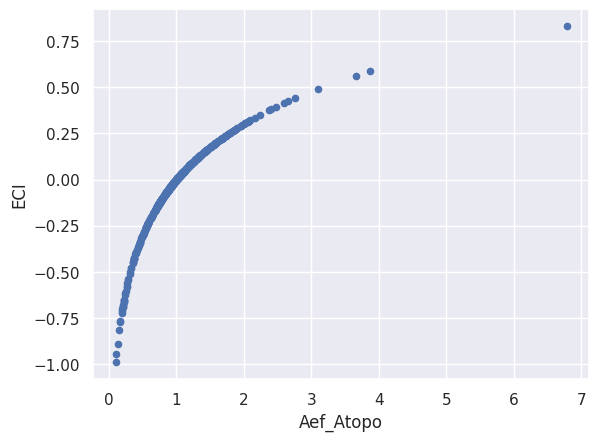

In [ ]:
sns.set(font_scale=1)

bacia_dados[['Aef_Atopo', 'ECI']].plot.scatter(x='Aef_Atopo', y='ECI')

In [ ]:
# Criando uma nova coluna chamada "substantial" e agrupando em 4 grupos
# A razão é de acordo com Liu et al. (2020)
max_ratio = 2
min_ratio = 0.5

bacia_dados.loc[bacia_dados['Aef_Atopo']>=max_ratio, 'substantial'] = 'Gaining'
bacia_dados.loc[(bacia_dados['Aef_Atopo']<max_ratio)&
              (bacia_dados['Aef_Atopo']>1), 'substantial'] = 'Small gain'
bacia_dados.loc[(bacia_dados['Aef_Atopo']>min_ratio)&
              (bacia_dados['Aef_Atopo']<=1), 'substantial'] = 'Small loss'
bacia_dados.loc[bacia_dados['Aef_Atopo']<=min_ratio, 'substantial'] = 'Losing'

In [ ]:
# Intervalos usando valores de ECI

max_ratio_eci = 0.113943
min_ratio_eci = -0.1549
bacia_dados.loc[bacia_dados['ECI']>= max_ratio_eci,'substantial_eci'] = 'Gaining'
bacia_dados.loc[(bacia_dados['ECI']<max_ratio_eci)&
              (bacia_dados['ECI']>0), 'substantial_eci'] = 'Small gain'
bacia_dados.loc[(bacia_dados['ECI']>min_ratio_eci)&
              (bacia_dados['ECI']<=0), 'substantial_eci'] = 'Small loss'
bacia_dados.loc[bacia_dados['ECI']<=min_ratio_eci, 'substantial_eci'] = 'Losing'

In [ ]:
bacia_dados.substantial.value_counts()

Small gain    354
Small loss    301
Losing         60
Gaining        20
Name: substantial, dtype: int64

In [ ]:
bacia_dados.substantial_eci.value_counts()

Small gain    256
Small loss    246
Gaining       118
Losing        114
Name: substantial_eci, dtype: int64

#4. Visualizando os dados

## Matplotlib

https://matplotlib.org/stable/gallery/index

# Seaborn

https://seaborn.pydata.org/examples/index.html

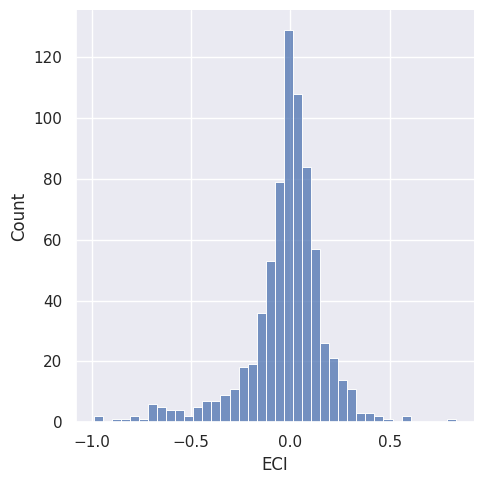

In [ ]:
# Plotando o Histograma
sns.set(font_scale=1)

sns.displot(bacia_dados, x='ECI', bins=40)

<Axes: >

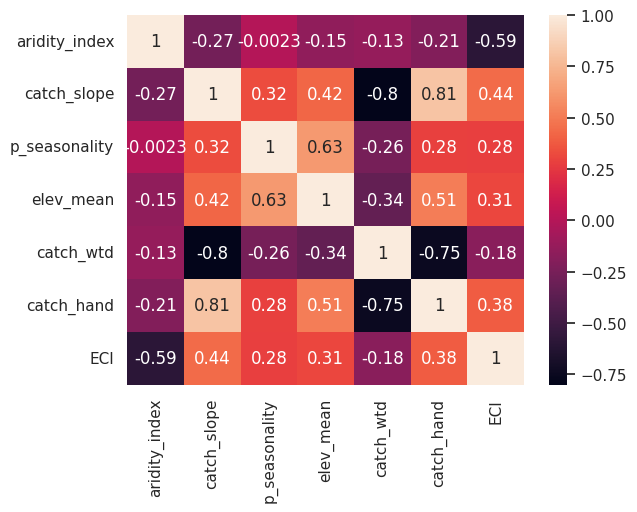

In [ ]:
# Plotando o Mapa de Calor da Correlação
sns.set(font_scale=1)

plot_variables = ['aridity_index', 'catch_slope','p_seasonality','elev_mean','catch_wtd','catch_hand', 'ECI']
pearson_corr = bacia_dados[plot_variables].corr()

sns.heatmap(pearson_corr, annot=True)

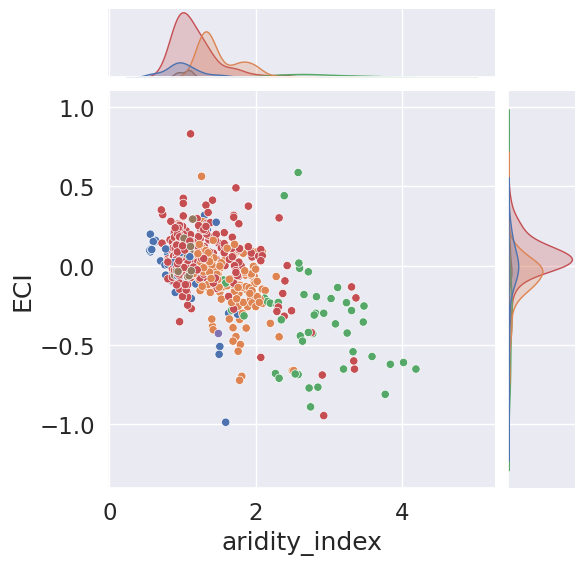

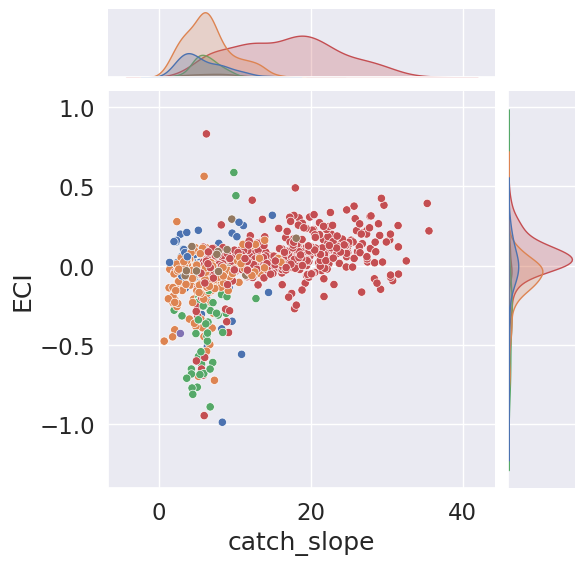

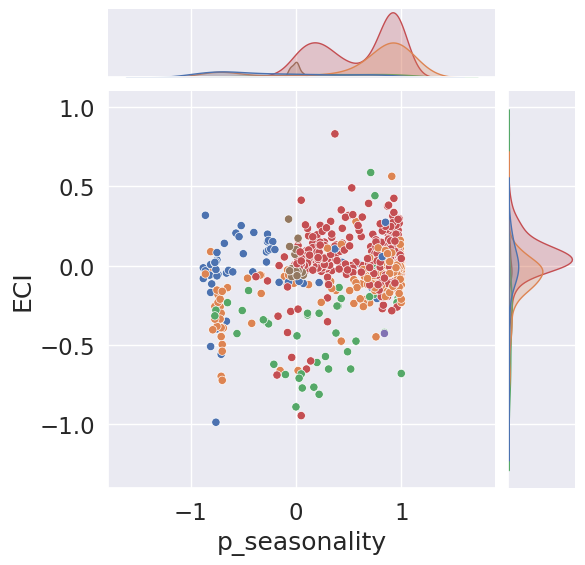

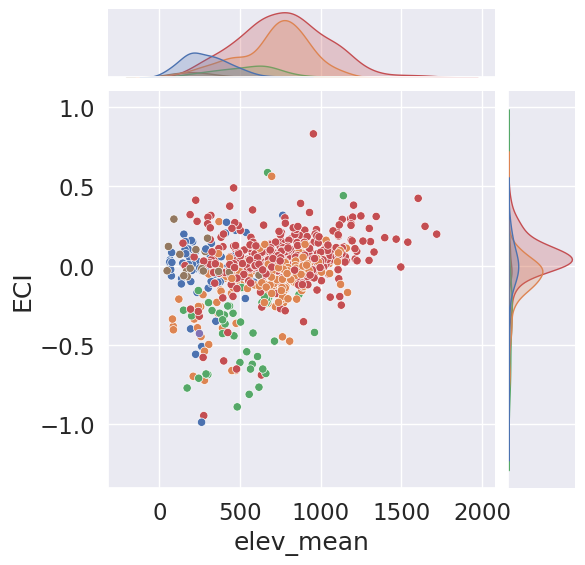

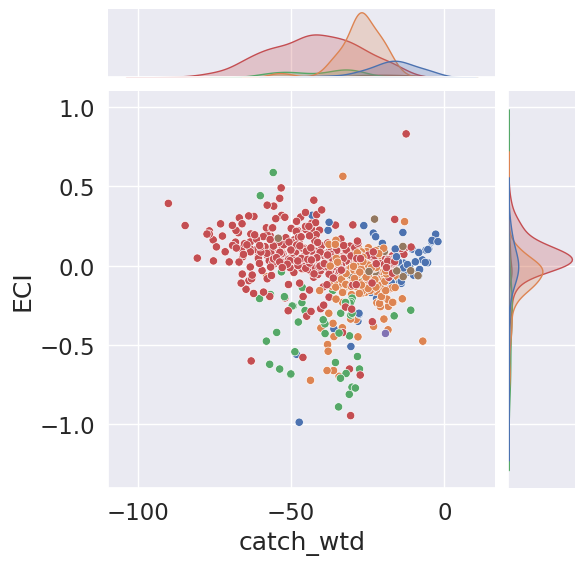

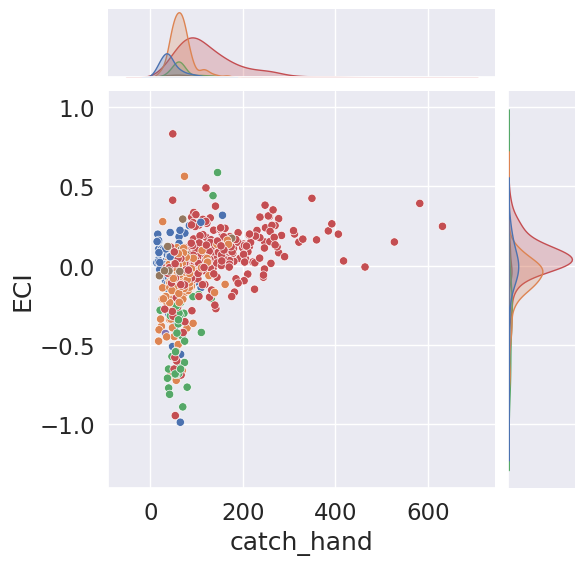

In [ ]:
#Aumento da fonte dos gráficos
sns.set(font_scale=1.5)

#Plotando gráficos de dispersão
for variable in plot_variables:
    ax = sns.jointplot(x=variable, y='ECI', hue='gauge_biome',
                       data=bacia_dados, legend=False)

<ipython-input-21-eb986fd6f39f>:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=variable, hue='gauge_biome',
<ipython-input-21-eb986fd6f39f>:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(y='ECI', hue='gauge_biome',
<ipython-input-21-eb986fd6f39f>:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=variable, hue='gauge_biome',
<ipython-input-21-eb986fd6f39f>:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(y='ECI', hue='gauge_biome',
<ipython-input-21-eb986fd6f39f>:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=variable, hue='gauge_biome',
<ipython-input-21-eb9

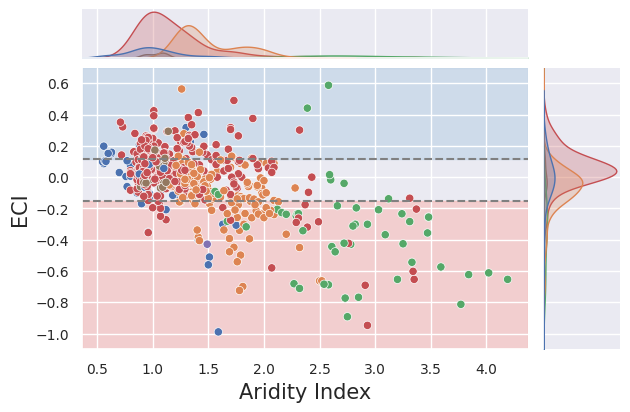

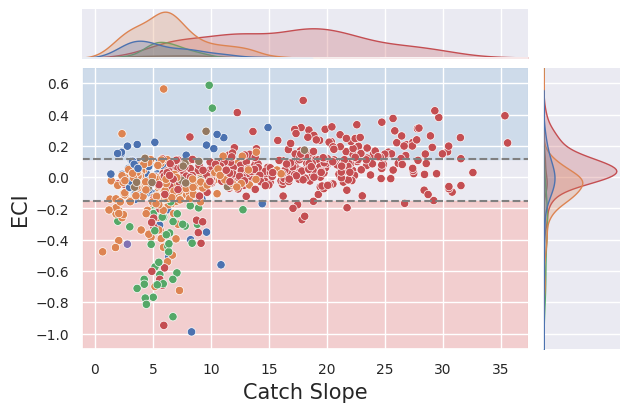

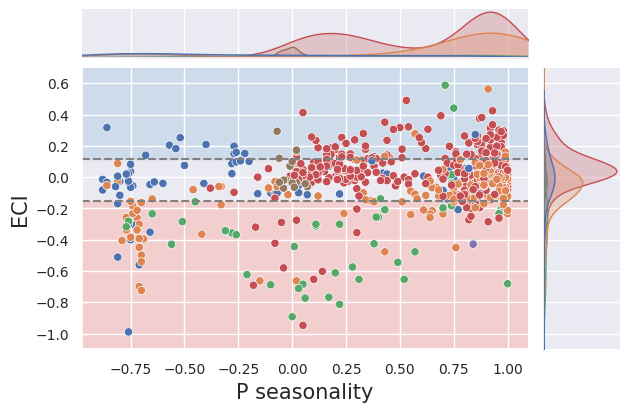

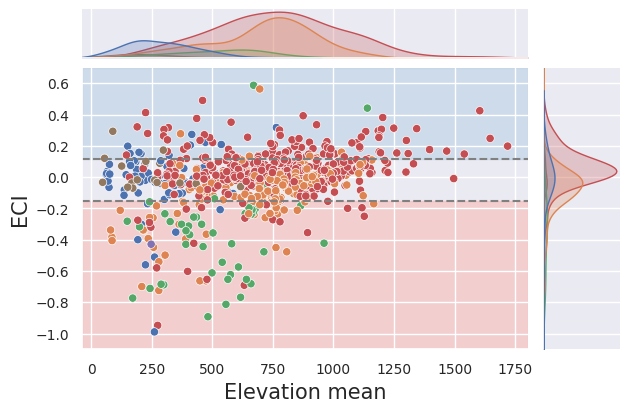

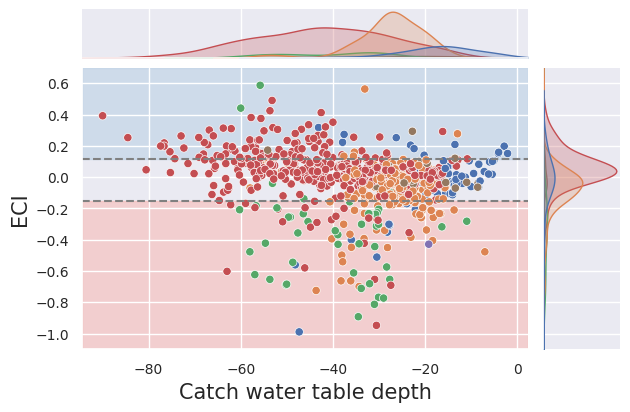

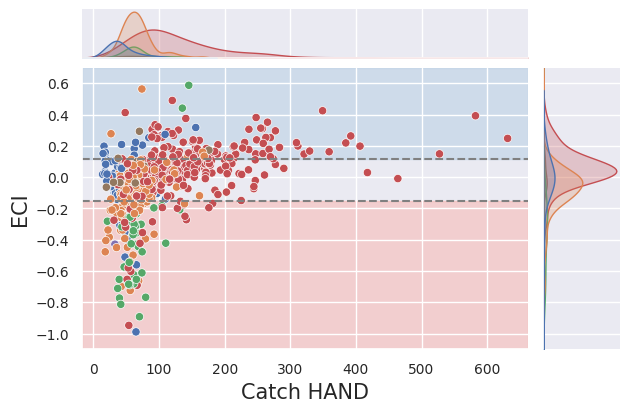

In [ ]:
max_ratio_eci = 0.113943
min_ratio_eci = -0.1549
label_variables = ['Aridity Index', 'Catch Slope', 'P seasonality','Elevation mean','Catch water table depth','Catch HAND']
# Fazendo loop de várias variavies
for variable, xlabel in zip(plot_variables, label_variables):
    # Inicio do JointGrid
    g = sns.JointGrid()
    # Especificar tamanho
    g.fig.set_figwidth(6.5)
    g.fig.set_figheight(4)

#     s=10
    #  Scatter plot para a figura da nuvem de pontos
    sns.scatterplot(
                    # Variaveis
                    x=variable,y='ECI', hue='gauge_biome',
                    # Inserindo Dataframe
                    data=bacia_dados,
                    # Aqui especifica que a o scatterplot é a img do meio
                    ax=g.ax_joint,
                    # Atributos do scatter
                    legend=False,
#                     s=s
    )
    #  Distribuição do eixo x e y
    sns.kdeplot(x=variable, hue='gauge_biome',
                data=bacia_dados,
                # Definindo qual ax é (no casa é o x)
                ax=g.ax_marg_x,
                # Atributos da parte da distribuição x
                legend=False, fill=True)
    sns.kdeplot(y='ECI', hue='gauge_biome',
                data=bacia_dados,
                # Definindo qual ax é (no casa é o y)
                ax=g.ax_marg_y,
                # Atributos da parte da distribuição y
                legend=False, fill=True)

    # Adicionando algumas faixas para a figura central (scatterplot) utilizando funções do matplotlib
    g.ax_joint.axhspan(min_ratio_eci,-1.1,alpha=0.5,color='#fbb4ae',zorder=0)
    g.ax_joint.axhspan(max_ratio_eci,0.7,alpha=0.5,color='#b3cde3',zorder=0)
    g.ax_joint.axhline(max_ratio_eci, ls='--',color='gray')
    g.ax_joint.axhline(min_ratio_eci, ls='--',color='gray')

    # Definidno parâmetros dos eixos
    g.ax_joint.tick_params(labelsize=10)
    g.ax_joint.set_xlabel(f'{xlabel}', fontsize=15)
    g.ax_joint.set_ylabel('ECI', fontsize=15)
    g.ax_joint.set_ylim((-1.1,0.7))

    # Definindo parâmetros de limite da figura
    ylimit_min = bacia_dados[variable].min()
    ylimit_max = bacia_dados[variable].max()
    range_ylim = ylimit_max - ylimit_min
    g.ax_joint.set_xlim((ylimit_min-0.05*range_ylim, ylimit_max+0.05*range_ylim))

    # Salvando figura
#     g.savefig(f'eci_variables_{variable}_s{s}.png', dpi=300)